In [1]:
#Import required libraries
import json
import pandas as pd
from pandas.io.json import json_normalize
import os
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel

In [2]:
os.chdir(r'Downloads')#Path to file directory

In [3]:
data = []
with open('customersdata.json') as f:
    for line in f:
        data.append(json.loads(line))

In [4]:
df = json_normalize(data) #Normalizing the data
df.head(3) 

,customer.customerBillingAddress,customer.customerDevice,customer.customerEmail,customer.customerIPAddress,customer.customerPhone,fraudulent,orders,paymentMethods,transactions
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,False,"[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."


# order table

In [5]:
orders_data=json_normalize(data,'orders',['fraudulent'],errors='ignore')
orders_data.head(10)

,orderAmount,orderId,orderShippingAddress,orderState,fraudulent
0,18,vjbdvd,"5493 Jones Islands\nBrownside, CA 51896",pending,False
1,26,yp6x27,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,False
2,45,nlghpa,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,True
3,23,uw0eeb,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,True
4,43,bn44oh,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,True
5,33,yk34y2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",failed,False
6,24,28v6b0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",fulfilled,False
7,25,itnk8y,"22396 Victor Lights\nCarsonstad, MO 93914",fulfilled,False
8,34,fbz9ep,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",fulfilled,False
9,26,7odnn6,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",fulfilled,False


# paymentMethod Table

In [6]:
paymentMethods_data=json_normalize(data,'paymentMethods',['fraudulent'])

In [7]:
paymentMethods_data.head()

,paymentMethodId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,fraudulent
0,wt07xm68b,Citizens First Banks,JCB 16 digit,True,card,False
1,y3xp697jx,Solace Banks,VISA 16 digit,True,bitcoin,True
2,6krszxc05,Vertex Bancorp,VISA 16 digit,False,card,True
3,5z1szj2he,His Majesty Bank Corp.,Diners Club / Carte Blanche,False,card,True
4,m52tx8e1s,Vertex Bancorp,Mastercard,False,card,True


In [8]:
transactions_data=json_normalize(data,'transactions',['fraudulent','customer'])

In [9]:
transactions_data.head(10)

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,fraudulent,customer
0,vjbdvd,wt07xm68b,18,False,a9lcj51r,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c..."
1,yp6x27,wt07xm68b,26,False,y4wcv03i,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c..."
2,nlghpa,41ug157xz,45,False,5mi94sfw,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c..."
3,uw0eeb,41ug157xz,23,False,br8ba1nu,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c..."
4,bn44oh,y3xp697jx,43,True,a33145ss,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c..."
5,yk34y2,8pneoi03z,33,False,q3lyvbza,False,"{'customerEmail': 'andersonwilliam@yahoo.com',..."
6,28v6b0,8pneoi03z,24,True,3alf9irw,False,"{'customerEmail': 'andersonwilliam@yahoo.com',..."
7,28v6b0,8pneoi03z,24,False,69w9wymx,False,"{'customerEmail': 'andersonwilliam@yahoo.com',..."
8,itnk8y,dluy3jka0,25,True,pegqc4ud,False,"{'customerEmail': 'andersonwilliam@yahoo.com',..."
9,itnk8y,8pneoi03z,25,False,uo3slwh7,False,"{'customerEmail': 'andersonwilliam@yahoo.com',..."


In [10]:
s=json_normalize(transactions_data['customer'])

In [11]:
type(s)

pandas.core.frame.DataFrame

In [12]:
f=pd.merge(transactions_data,paymentMethods_data,on='paymentMethodId')#merging transaction table and paymentMethods table as f

In [13]:
f.tail(3)

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,fraudulent_x,customer,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,fraudulent_y
620,1bubxa,7yen1m1q8,25,True,7yilsi1o,False,"{'customerEmail': 'dawn05@tucker-brown.com', '...",Vertex Bancorp,VISA 13 digit,False,card,False
621,1bubxa,7yen1m1q8,25,False,c82k5bcv,False,"{'customerEmail': 'dawn05@tucker-brown.com', '...",Vertex Bancorp,VISA 13 digit,False,card,False
622,5lmvrj,f0xnu5om9,27,False,wgmajf82,False,"{'customerEmail': 'dawn05@tucker-brown.com', '...",His Majesty Bank Corp.,JCB 16 digit,False,card,False


In [14]:
f.shape

(623, 12)

In [15]:
h=pd.merge(f,orders_data,on='orderId')#merging Orders_data and f=[transaction_data+payments_data]

In [16]:
h.shape

(623, 16)

In [17]:
h.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,fraudulent_x,customer,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,fraudulent_y,orderAmount,orderShippingAddress,orderState,fraudulent
0,vjbdvd,wt07xm68b,18,False,a9lcj51r,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...",Citizens First Banks,JCB 16 digit,True,card,False,18,"5493 Jones Islands\nBrownside, CA 51896",pending,False
1,yp6x27,wt07xm68b,26,False,y4wcv03i,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...",Citizens First Banks,JCB 16 digit,True,card,False,26,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,False
2,nlghpa,41ug157xz,45,False,5mi94sfw,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...",Bastion Banks,American Express,False,bitcoin,True,45,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,True
3,uw0eeb,41ug157xz,23,False,br8ba1nu,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...",Bastion Banks,American Express,False,bitcoin,True,23,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,True
4,bn44oh,y3xp697jx,43,True,a33145ss,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...",Solace Banks,VISA 16 digit,True,bitcoin,True,43,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,True


In [18]:
df1=h.drop(['fraudulent_x','fraudulent_y'],axis=1)#Dropping unnecessary columns

In [19]:
df1.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,customer,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderAmount,orderShippingAddress,orderState,fraudulent
0,vjbdvd,wt07xm68b,18,False,a9lcj51r,"{'customerEmail': 'josephhoward@yahoo.com', 'c...",Citizens First Banks,JCB 16 digit,True,card,18,"5493 Jones Islands\nBrownside, CA 51896",pending,False
1,yp6x27,wt07xm68b,26,False,y4wcv03i,"{'customerEmail': 'josephhoward@yahoo.com', 'c...",Citizens First Banks,JCB 16 digit,True,card,26,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,False
2,nlghpa,41ug157xz,45,False,5mi94sfw,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...",Bastion Banks,American Express,False,bitcoin,45,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,True
3,uw0eeb,41ug157xz,23,False,br8ba1nu,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...",Bastion Banks,American Express,False,bitcoin,23,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,True
4,bn44oh,y3xp697jx,43,True,a33145ss,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...",Solace Banks,VISA 16 digit,True,bitcoin,43,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,True


In [20]:
c=json_normalize(h['customer'])

In [21]:
c.head()

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415
1,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415
2,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546
3,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546
4,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546


# customer table

In [22]:
Customer_data=pd.concat([df1,c],axis=1)#Concatinating two data frames

# Final data

In [23]:
Customer_data=Customer_data.drop(['customer'],axis=1)#Final data

In [24]:
Customer_data.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderAmount,orderShippingAddress,orderState,fraudulent,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone
0,vjbdvd,wt07xm68b,18,False,a9lcj51r,Citizens First Banks,JCB 16 digit,True,card,18,"5493 Jones Islands\nBrownside, CA 51896",pending,False,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415
1,yp6x27,wt07xm68b,26,False,y4wcv03i,Citizens First Banks,JCB 16 digit,True,card,26,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,False,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415
2,nlghpa,41ug157xz,45,False,5mi94sfw,Bastion Banks,American Express,False,bitcoin,45,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,True,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546
3,uw0eeb,41ug157xz,23,False,br8ba1nu,Bastion Banks,American Express,False,bitcoin,23,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,True,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546
4,bn44oh,y3xp697jx,43,True,a33145ss,Solace Banks,VISA 16 digit,True,bitcoin,43,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,True,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546


In [25]:
Customer_data.to_csv('Customer_data.csv',index=False)#Saving data to csv file

# EDA and Data Preprocessing

In [26]:
Customer_data.info()#information about data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 622
Data columns (total 18 columns):
orderId                             623 non-null object
paymentMethodId                     623 non-null object
transactionAmount                   623 non-null int64
transactionFailed                   623 non-null bool
transactionId                       623 non-null object
paymentMethodIssuer                 623 non-null object
paymentMethodProvider               623 non-null object
paymentMethodRegistrationFailure    623 non-null bool
paymentMethodType                   623 non-null object
orderAmount                         623 non-null int64
orderShippingAddress                623 non-null object
orderState                          623 non-null object
fraudulent                          623 non-null bool
customerBillingAddress              623 non-null object
customerDevice                      623 non-null object
customerEmail                       623 non-null object
custome

In [27]:
Customer_data.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderAmount,orderShippingAddress,orderState,fraudulent,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone
0,vjbdvd,wt07xm68b,18,False,a9lcj51r,Citizens First Banks,JCB 16 digit,True,card,18,"5493 Jones Islands\nBrownside, CA 51896",pending,False,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415
1,yp6x27,wt07xm68b,26,False,y4wcv03i,Citizens First Banks,JCB 16 digit,True,card,26,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,False,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415
2,nlghpa,41ug157xz,45,False,5mi94sfw,Bastion Banks,American Express,False,bitcoin,45,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,True,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546
3,uw0eeb,41ug157xz,23,False,br8ba1nu,Bastion Banks,American Express,False,bitcoin,23,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,True,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546
4,bn44oh,y3xp697jx,43,True,a33145ss,Solace Banks,VISA 16 digit,True,bitcoin,43,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,True,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546


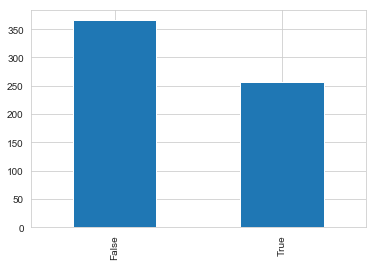

In [28]:
Customer_data['fraudulent'].value_counts().plot.bar()#count 

In [29]:
Customer_data['paymentMethodType'].value_counts()

card         479
apple pay     49
paypal        48
bitcoin       47
Name: paymentMethodType, dtype: int64

In [30]:
(Customer_data['paymentMethodType'].value_counts()/len(Customer_data))*100

card         76.886035
apple pay     7.865169
paypal        7.704655
bitcoin       7.544141
Name: paymentMethodType, dtype: float64

In [31]:
Customer_data['customerEmail'].value_counts().head(10)

johnlowery@gmail.com             28
mitchellgriffith@yahoo.com       15
tmcpherson@wright.com            13
lleonard@turner-fleming.com      11
vmiller@hotmail.com              10
david45@gmail.com                10
1yf0@jedyz63t                    10
karen54@mullins.biz               8
brandon58@conner.com              8
ethompson@jackson-sanders.com     8
Name: customerEmail, dtype: int64

In [32]:
cmap={False:0,True:1}

In [33]:
Customer_data['fraudulent']=Customer_data['fraudulent'].map(cmap)
Customer_data['transactionFailed']=Customer_data['transactionFailed'].map(cmap)
Customer_data['paymentMethodRegistrationFailure']=Customer_data['paymentMethodRegistrationFailure'].map(cmap)

In [34]:
Customer_data.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderAmount,orderShippingAddress,orderState,fraudulent,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone
0,vjbdvd,wt07xm68b,18,0,a9lcj51r,Citizens First Banks,JCB 16 digit,1,card,18,"5493 Jones Islands\nBrownside, CA 51896",pending,0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415
1,yp6x27,wt07xm68b,26,0,y4wcv03i,Citizens First Banks,JCB 16 digit,1,card,26,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415
2,nlghpa,41ug157xz,45,0,5mi94sfw,Bastion Banks,American Express,0,bitcoin,45,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546
3,uw0eeb,41ug157xz,23,0,br8ba1nu,Bastion Banks,American Express,0,bitcoin,23,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546
4,bn44oh,y3xp697jx,43,1,a33145ss,Solace Banks,VISA 16 digit,1,bitcoin,43,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546


In [35]:
Customer_data.paymentMethodIssuer.value_counts()

Her Majesty Trust           66
His Majesty Bank Corp.      65
Vertex Bancorp              63
Fountain Financial Inc.     60
Bulwark Trust Corp.         59
Rose Bancshares             59
Bastion Banks               58
Grand Credit Corporation    55
Citizens First Banks        55
Solace Banks                41
B                           10
e                            7
c                            7
r                            6
x                            4
a                            4
o                            2
p                            1
n                            1
Name: paymentMethodIssuer, dtype: int64

In [36]:
Customer_data.loc[Customer_data['paymentMethodIssuer']=='B','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='a','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='c','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='e','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='n','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='o','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='p','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='r','paymentMethodIssuer']='Unknown Bank'
Customer_data.loc[Customer_data['paymentMethodIssuer']=='x','paymentMethodIssuer']='Unknown Bank'

In [37]:
Customer_data['paymentMethodIssuer'].value_counts()

Her Majesty Trust           66
His Majesty Bank Corp.      65
Vertex Bancorp              63
Fountain Financial Inc.     60
Bulwark Trust Corp.         59
Rose Bancshares             59
Bastion Banks               58
Grand Credit Corporation    55
Citizens First Banks        55
Unknown Bank                42
Solace Banks                41
Name: paymentMethodIssuer, dtype: int64

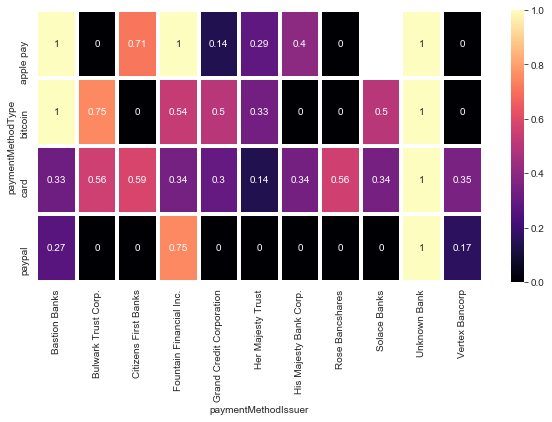

In [38]:
cc=Customer_data.pivot_table(index='paymentMethodType',columns='paymentMethodIssuer',values='fraudulent')
plt.figure(figsize=(10,5))
sns.heatmap(cc,cmap='magma',linecolor='White',linewidths=3,annot=True)

#The chance of being fraud is more in unknown banks is 100% 
#1.00 represents 100% chance of being fraud and 0.00 represents 0 % being fraud

In [39]:
sn=Customer_data.pivot_table(index='paymentMethodType',columns='paymentMethodProvider',values='fraudulent')

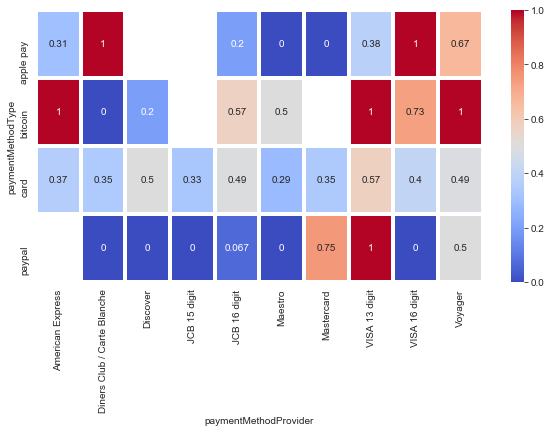

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(sn,cmap='coolwarm',linecolor='White',linewidths=3,annot=True)

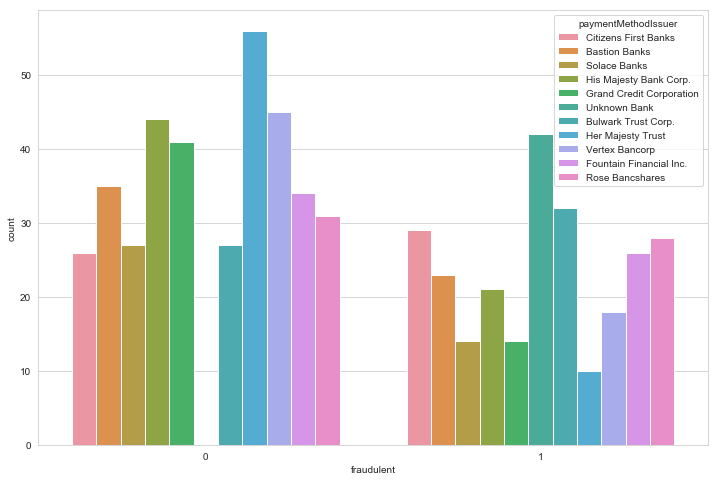

In [41]:
#we can also see by using visualizations
plt.figure(figsize=(12,8))
sns.countplot(x='fraudulent',hue='paymentMethodIssuer',data=Customer_data)

#Unknown banks showing more fraud count followed by Bulwark Trust Corp so be carful while doing transactions by this banks

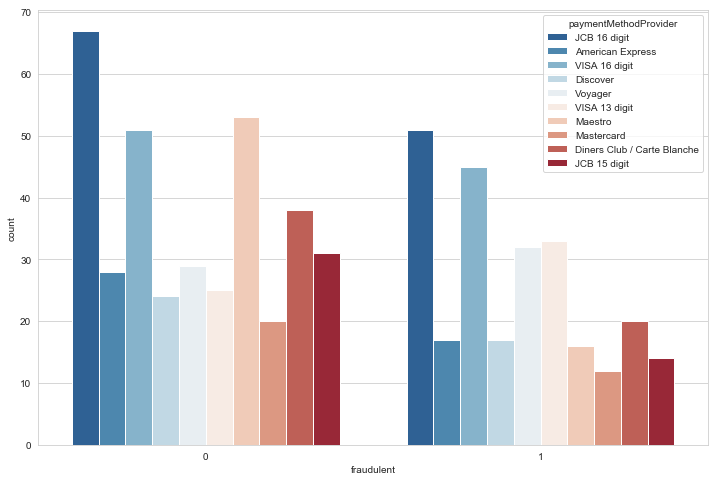

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(x='fraudulent',hue='paymentMethodProvider',data=Customer_data,palette='RdBu_r')

In [43]:
Customer_data.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderAmount,orderShippingAddress,orderState,fraudulent,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone
0,vjbdvd,wt07xm68b,18,0,a9lcj51r,Citizens First Banks,JCB 16 digit,1,card,18,"5493 Jones Islands\nBrownside, CA 51896",pending,0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415
1,yp6x27,wt07xm68b,26,0,y4wcv03i,Citizens First Banks,JCB 16 digit,1,card,26,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415
2,nlghpa,41ug157xz,45,0,5mi94sfw,Bastion Banks,American Express,0,bitcoin,45,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546
3,uw0eeb,41ug157xz,23,0,br8ba1nu,Bastion Banks,American Express,0,bitcoin,23,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546
4,bn44oh,y3xp697jx,43,1,a33145ss,Solace Banks,VISA 16 digit,1,bitcoin,43,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546


In [44]:
#Extract Adress street,city,pincode
Customer_data['Customer_Area']=Customer_data['customerBillingAddress'].str.split("\n",expand=True)[1].str.split(",", expand=True)[0]
Customer_data['Customer_state']=Customer_data['customerBillingAddress'].str.split(",",expand=True)[1].str[:2]
Customer_data['Customer_city']=Customer_data['customerBillingAddress'].str.split(",",expand=True)[1].str[:3]
Customer_data['Customer_street']=Customer_data['customerBillingAddress'].str.split("\n",expand=True)[0]
Customer_data['Customer_pincode']=Customer_data['customerBillingAddress'].str.split(",",expand=True)[1].str[3:]

In [45]:
Customer_data['ordershipping_Area']=Customer_data['orderShippingAddress'].str.split("\n",expand=True)[1].str.split(",", expand=True)[0]
Customer_data['ordershipping_City']=Customer_data['orderShippingAddress'].str.split(",",expand=True)[1].str[:3]
Customer_data['ordershipping_state']=Customer_data['orderShippingAddress'].str.split(",",expand=True)[1].str[:2]
Customer_data['ordershipping_street']=Customer_data['orderShippingAddress'].str.split("\n",expand=True)[0]
Customer_data['ordershipping_pincode']=Customer_data['orderShippingAddress'].str.split(",",expand=True)[1].str[3:]

In [46]:
df=Customer_data.drop(['customerBillingAddress','orderShippingAddress'],axis=1)

In [47]:
df.head()

,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderAmount,...,Customer_Area,Customer_state,Customer_city,Customer_street,Customer_pincode,ordershipping_Area,ordershipping_City,ordershipping_state,ordershipping_street,ordershipping_pincode
0,vjbdvd,wt07xm68b,18,0,a9lcj51r,Citizens First Banks,JCB 16 digit,1,card,18,...,Brownside,C,CA,5493 Jones Islands,51896,Brownside,CA,C,5493 Jones Islands,51896
1,yp6x27,wt07xm68b,26,0,y4wcv03i,Citizens First Banks,JCB 16 digit,1,card,26,...,Brownside,C,CA,5493 Jones Islands,51896,Brownside,CA,C,5493 Jones Islands,51896
2,nlghpa,41ug157xz,45,0,5mi94sfw,Bastion Banks,American Express,0,bitcoin,45,...,Port Joshuabury,N,NM,356 Elizabeth Inlet Suite 120,37681,New Keithview,CA,C,898 Henry Ports,95893-2497
3,uw0eeb,41ug157xz,23,0,br8ba1nu,Bastion Banks,American Express,0,bitcoin,23,...,Port Joshuabury,N,NM,356 Elizabeth Inlet Suite 120,37681,Port Joshuabury,NM,N,356 Elizabeth Inlet Suite 120,37681
4,bn44oh,y3xp697jx,43,1,a33145ss,Solace Banks,VISA 16 digit,1,bitcoin,43,...,Port Joshuabury,N,NM,356 Elizabeth Inlet Suite 120,37681,Joshuaton,FM,F,5093 Bryan Forks,01565-9801


In [48]:
df.dtypes

orderId                             object
paymentMethodId                     object
transactionAmount                    int64
transactionFailed                    int64
transactionId                       object
paymentMethodIssuer                 object
paymentMethodProvider               object
paymentMethodRegistrationFailure     int64
paymentMethodType                   object
orderAmount                          int64
orderState                          object
fraudulent                           int64
customerDevice                      object
customerEmail                       object
customerIPAddress                   object
customerPhone                       object
Customer_Area                       object
Customer_state                      object
Customer_city                       object
Customer_street                     object
Customer_pincode                    object
ordershipping_Area                  object
ordershipping_City                  object
ordershippi

In [49]:
df=df.drop(['orderId','paymentMethodId','transactionId','transactionAmount','Customer_street','ordershipping_street'],axis=1)

In [50]:
df.head()

,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderAmount,orderState,fraudulent,customerDevice,customerEmail,customerIPAddress,customerPhone,Customer_Area,Customer_state,Customer_city,Customer_pincode,ordershipping_Area,ordershipping_City,ordershipping_state,ordershipping_pincode
0,0,Citizens First Banks,JCB 16 digit,1,card,18,pending,0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,Brownside,C,CA,51896,Brownside,CA,C,51896
1,0,Citizens First Banks,JCB 16 digit,1,card,26,fulfilled,0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,Brownside,C,CA,51896,Brownside,CA,C,51896
2,0,Bastion Banks,American Express,0,bitcoin,45,fulfilled,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,Port Joshuabury,N,NM,37681,New Keithview,CA,C,95893-2497
3,0,Bastion Banks,American Express,0,bitcoin,23,fulfilled,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,Port Joshuabury,N,NM,37681,Port Joshuabury,NM,N,37681
4,1,Solace Banks,VISA 16 digit,1,bitcoin,43,fulfilled,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,Port Joshuabury,N,NM,37681,Joshuaton,FM,F,01565-9801


In [51]:
df['orderState'].value_counts()

fulfilled    516
failed        63
pending       44
Name: orderState, dtype: int64

In [52]:
df.loc[df['orderState']=='fulfilled','orderState']='1'
df.loc[df['orderState']=='failed','orderState']='0'
df.loc[df['orderState']=='pending','orderState']='2'

In [53]:
df.head()

,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderAmount,orderState,fraudulent,customerDevice,customerEmail,customerIPAddress,customerPhone,Customer_Area,Customer_state,Customer_city,Customer_pincode,ordershipping_Area,ordershipping_City,ordershipping_state,ordershipping_pincode
0,0,Citizens First Banks,JCB 16 digit,1,card,18,2,0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,Brownside,C,CA,51896,Brownside,CA,C,51896
1,0,Citizens First Banks,JCB 16 digit,1,card,26,1,0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,Brownside,C,CA,51896,Brownside,CA,C,51896
2,0,Bastion Banks,American Express,0,bitcoin,45,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,Port Joshuabury,N,NM,37681,New Keithview,CA,C,95893-2497
3,0,Bastion Banks,American Express,0,bitcoin,23,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,Port Joshuabury,N,NM,37681,Port Joshuabury,NM,N,37681
4,1,Solace Banks,VISA 16 digit,1,bitcoin,43,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,Port Joshuabury,N,NM,37681,Joshuaton,FM,F,01565-9801


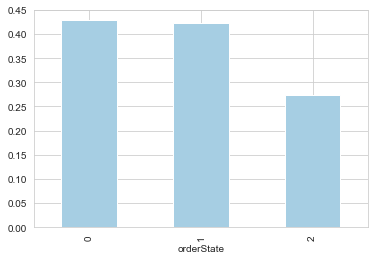

In [54]:
df.groupby('orderState')['fraudulent'].mean().plot(kind='bar', stacked=True, colormap='Paired')

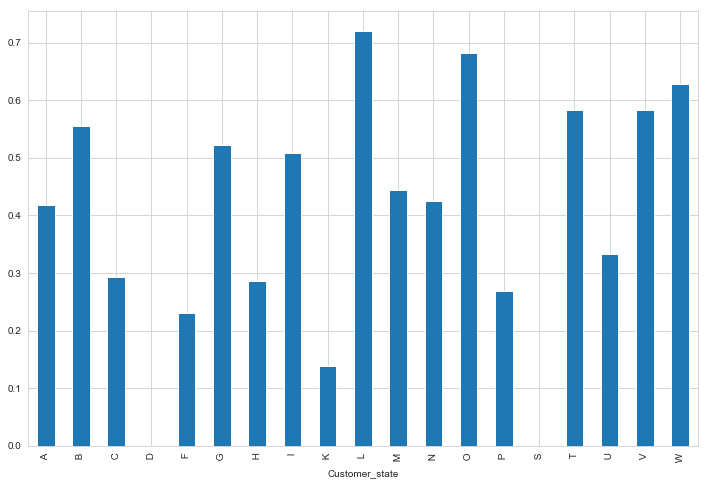

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
df.groupby('Customer_state')['fraudulent'].mean().plot.bar()#state wise

#By seeing above plot we can say that States D and S shows 0% chance of fraud while L and O shows 70% being fraud

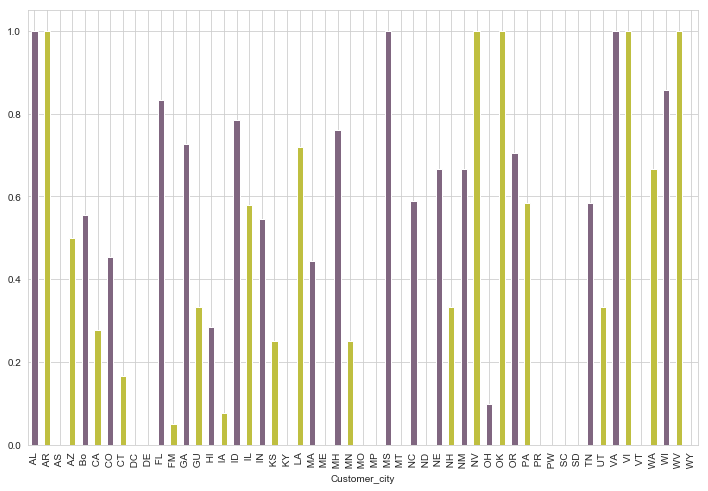

In [56]:
#lets see city wise
plt.figure(figsize=(12,8))
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5
df.groupby('Customer_city')['fraudulent'].mean().plot(kind='bar', stacked=True, color=my_colors)

#City wise we can see that AL,AR,MS,NV,Ok,VA,VI,WV shows 100% of being fraud


In [57]:
dd=Customer_data.pivot_table(index='Customer_state',columns='paymentMethodIssuer',values='fraudulent')

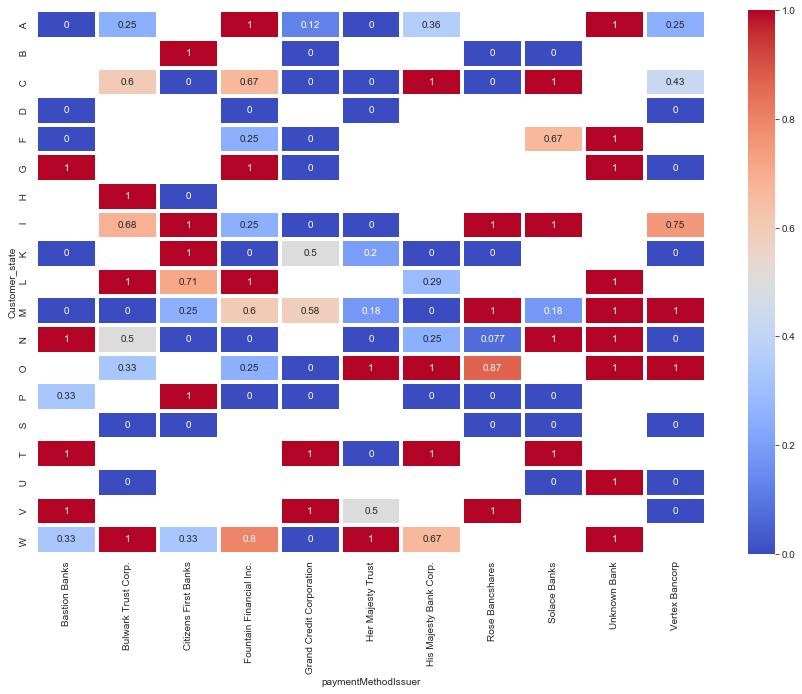

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(dd,cmap='coolwarm',linewidth=3,linecolor='white',annot=True)

we can see that in "A" state Fountain Finanicial and unkown banks shows 100% fraud like wise we can see remaining banks

In [59]:
#Lets extract Customer name from Email
df['customer_name']=df['customerEmail'].str.split('@',expand=True)[0]
df['customer_mailing_websites']=df['customerEmail'].str.split('@',expand=True)[1]

In [60]:
df.head()

,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderAmount,orderState,fraudulent,customerDevice,customerEmail,...,Customer_Area,Customer_state,Customer_city,Customer_pincode,ordershipping_Area,ordershipping_City,ordershipping_state,ordershipping_pincode,customer_name,customer_mailing_websites
0,0,Citizens First Banks,JCB 16 digit,1,card,18,2,0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,...,Brownside,C,CA,51896,Brownside,CA,C,51896,josephhoward,yahoo.com
1,0,Citizens First Banks,JCB 16 digit,1,card,26,1,0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,...,Brownside,C,CA,51896,Brownside,CA,C,51896,josephhoward,yahoo.com
2,0,Bastion Banks,American Express,0,bitcoin,45,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,...,Port Joshuabury,N,NM,37681,New Keithview,CA,C,95893-2497,evansjeffery,yahoo.com
3,0,Bastion Banks,American Express,0,bitcoin,23,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,...,Port Joshuabury,N,NM,37681,Port Joshuabury,NM,N,37681,evansjeffery,yahoo.com
4,1,Solace Banks,VISA 16 digit,1,bitcoin,43,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,...,Port Joshuabury,N,NM,37681,Joshuaton,FM,F,01565-9801,evansjeffery,yahoo.com


In [61]:
df['customer_mailing_websites'].value_counts()

gmail.com                 121
yahoo.com                 118
hotmail.com                88
wright.com                 19
turner-fleming.com         11
jedyz63t                   10
mullins.biz                 8
jackson-sanders.com         8
levine-harmon.biz           8
conner.com                  8
tucker-brown.com            7
pena.org                    7
brown.com                   7
randall-pacheco.biz         7
malone.com                  7
bell.com                    6
mitchell-hancock.com        6
1jcfcxs7                    6
jones.com                   6
wallace-johnson.com         6
mckinney.com                6
day.info                    6
hughes.biz                  6
clark.biz                   5
stephens-ortiz.com          5
sutton.info                 5
conrad.net                  5
harris.com                  5
mcgee.com                   5
rogers.com                  5
                         ... 
henderson.biz               4
chavez.com                  4
hayes-wils

#we can see lot of websites let's simplify them  by binnig
#we all of know well known websites like gmail.com,yahoo.com and hotmail.com so i am binning them as known websites and remaining as unknown

In [62]:
df.loc[(df['customer_mailing_websites']=='gmail.com') | (df['customer_mailing_websites']=='yahoo.com') | (df['customer_mailing_websites']=='hotmail.com'),'customer_mailing_sites']= 'Known'
df.loc[(df['customer_mailing_websites']!='gmail.com') & (df['customer_mailing_websites']!='yahoo.com') & (df['customer_mailing_websites']!='hotmail.com'),'customer_mailing_sites']= 'UnKnown'

In [63]:
df.head()

,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderAmount,orderState,fraudulent,customerDevice,customerEmail,...,Customer_state,Customer_city,Customer_pincode,ordershipping_Area,ordershipping_City,ordershipping_state,ordershipping_pincode,customer_name,customer_mailing_websites,customer_mailing_sites
0,0,Citizens First Banks,JCB 16 digit,1,card,18,2,0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,...,C,CA,51896,Brownside,CA,C,51896,josephhoward,yahoo.com,Known
1,0,Citizens First Banks,JCB 16 digit,1,card,26,1,0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,...,C,CA,51896,Brownside,CA,C,51896,josephhoward,yahoo.com,Known
2,0,Bastion Banks,American Express,0,bitcoin,45,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,...,N,NM,37681,New Keithview,CA,C,95893-2497,evansjeffery,yahoo.com,Known
3,0,Bastion Banks,American Express,0,bitcoin,23,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,...,N,NM,37681,Port Joshuabury,NM,N,37681,evansjeffery,yahoo.com,Known
4,1,Solace Banks,VISA 16 digit,1,bitcoin,43,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,...,N,NM,37681,Joshuaton,FM,F,01565-9801,evansjeffery,yahoo.com,Known


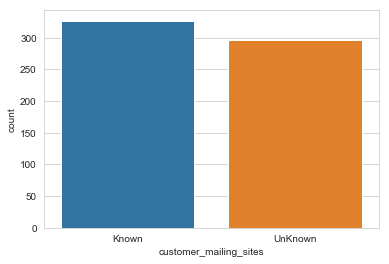

In [64]:
sns.countplot(x='customer_mailing_sites',data=df)

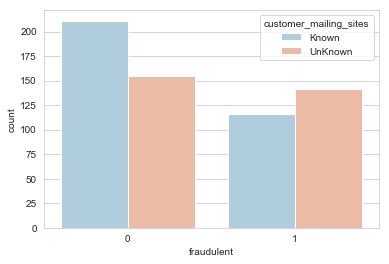

In [65]:
sns.countplot(x='fraudulent',hue='customer_mailing_sites',data=df,palette='RdBu_r')

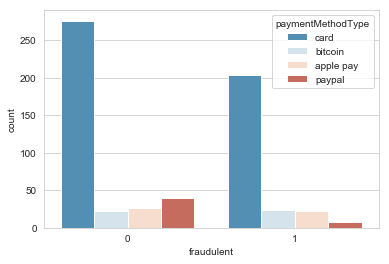

In [66]:
sns.countplot(x='fraudulent',hue='paymentMethodType',data=df,palette='RdBu_r')

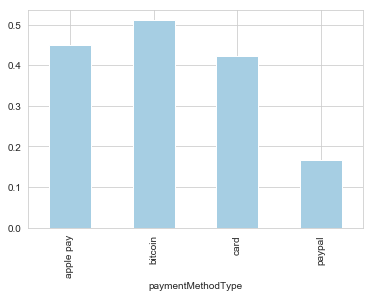

In [67]:
df.groupby('paymentMethodType')['fraudulent'].mean().plot(kind='bar', colormap='Paired')

Bitcoin shows 50% of being fraud

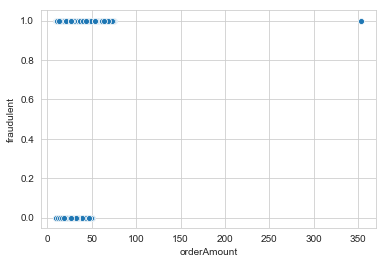

In [68]:
sns.scatterplot(x='orderAmount',y='fraudulent',data=df)

we can see the presence of outlier and also we can see that order amount lies between 10 to 75 approx

In [69]:
# another way to find outliers using z score or using boxplot if data is huge
import numpy as np
outliers=[]
def detect_outlier(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [70]:
outliers=detect_outlier(df['orderAmount'])

In [71]:
outliers

[353]

In [72]:
df.shape

(623, 23)

In [73]:
df.set_index('orderAmount',inplace=True)#Setting order amount as index

In [74]:
df.head()

,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderState,fraudulent,customerDevice,customerEmail,customerIPAddress,...,Customer_state,Customer_city,Customer_pincode,ordershipping_Area,ordershipping_City,ordershipping_state,ordershipping_pincode,customer_name,customer_mailing_websites,customer_mailing_sites
orderAmount,,,,,,,,,,,,,,,,,,,,,
18,0,Citizens First Banks,JCB 16 digit,1,card,2,0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,...,C,CA,51896,Brownside,CA,C,51896,josephhoward,yahoo.com,Known
26,0,Citizens First Banks,JCB 16 digit,1,card,1,0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,...,C,CA,51896,Brownside,CA,C,51896,josephhoward,yahoo.com,Known
45,0,Bastion Banks,American Express,0,bitcoin,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,...,N,NM,37681,New Keithview,CA,C,95893-2497,evansjeffery,yahoo.com,Known
23,0,Bastion Banks,American Express,0,bitcoin,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,...,N,NM,37681,Port Joshuabury,NM,N,37681,evansjeffery,yahoo.com,Known
43,1,Solace Banks,VISA 16 digit,1,bitcoin,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,...,N,NM,37681,Joshuaton,FM,F,01565-9801,evansjeffery,yahoo.com,Known


In [75]:
df.drop(353,inplace=True)#Dropping outlier

In [76]:
df=df.reset_index()#reset index

In [77]:
df.shape#we can see that no of rows is 622 so the outlier is removed

(622, 23)

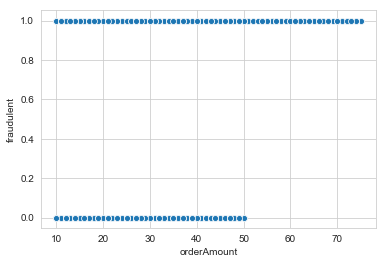

In [78]:
#Lets Check
sns.scatterplot(x='orderAmount',y='fraudulent',data=df)

In [79]:
df.head()

,orderAmount,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderState,fraudulent,customerDevice,customerEmail,...,Customer_state,Customer_city,Customer_pincode,ordershipping_Area,ordershipping_City,ordershipping_state,ordershipping_pincode,customer_name,customer_mailing_websites,customer_mailing_sites
0,18,0,Citizens First Banks,JCB 16 digit,1,card,2,0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,...,C,CA,51896,Brownside,CA,C,51896,josephhoward,yahoo.com,Known
1,26,0,Citizens First Banks,JCB 16 digit,1,card,1,0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,...,C,CA,51896,Brownside,CA,C,51896,josephhoward,yahoo.com,Known
2,45,0,Bastion Banks,American Express,0,bitcoin,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,...,N,NM,37681,New Keithview,CA,C,95893-2497,evansjeffery,yahoo.com,Known
3,23,0,Bastion Banks,American Express,0,bitcoin,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,...,N,NM,37681,Port Joshuabury,NM,N,37681,evansjeffery,yahoo.com,Known
4,43,1,Solace Banks,VISA 16 digit,1,bitcoin,1,1,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,...,N,NM,37681,Joshuaton,FM,F,01565-9801,evansjeffery,yahoo.com,Known


In [80]:
#Remove unwanted columns
data=df.drop(['customerDevice','customerEmail','customerIPAddress','customerPhone','ordershipping_City','Customer_city','ordershipping_Area','customer_mailing_websites','ordershipping_pincode','Customer_pincode'],axis=1)

In [81]:
data.head()

,orderAmount,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderState,fraudulent,Customer_Area,Customer_state,ordershipping_state,customer_name,customer_mailing_sites
0,18,0,Citizens First Banks,JCB 16 digit,1,card,2,0,Brownside,C,C,josephhoward,Known
1,26,0,Citizens First Banks,JCB 16 digit,1,card,1,0,Brownside,C,C,josephhoward,Known
2,45,0,Bastion Banks,American Express,0,bitcoin,1,1,Port Joshuabury,N,C,evansjeffery,Known
3,23,0,Bastion Banks,American Express,0,bitcoin,1,1,Port Joshuabury,N,N,evansjeffery,Known
4,43,1,Solace Banks,VISA 16 digit,1,bitcoin,1,1,Port Joshuabury,N,F,evansjeffery,Known


In [82]:
data=data.drop(['customer_name','Customer_Area'],axis=1)

In [83]:
data.head()

,orderAmount,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderState,fraudulent,Customer_state,ordershipping_state,customer_mailing_sites
0,18,0,Citizens First Banks,JCB 16 digit,1,card,2,0,C,C,Known
1,26,0,Citizens First Banks,JCB 16 digit,1,card,1,0,C,C,Known
2,45,0,Bastion Banks,American Express,0,bitcoin,1,1,N,C,Known
3,23,0,Bastion Banks,American Express,0,bitcoin,1,1,N,N,Known
4,43,1,Solace Banks,VISA 16 digit,1,bitcoin,1,1,N,F,Known


In [84]:
data.dtypes

orderAmount                          int64
transactionFailed                    int64
paymentMethodIssuer                 object
paymentMethodProvider               object
paymentMethodRegistrationFailure     int64
paymentMethodType                   object
orderState                          object
fraudulent                           int64
Customer_state                      object
ordershipping_state                 object
customer_mailing_sites              object
dtype: object

In [85]:
data.isnull().sum()#sum of missing values in each column

orderAmount                          0
transactionFailed                    0
paymentMethodIssuer                  0
paymentMethodProvider                0
paymentMethodRegistrationFailure     0
paymentMethodType                    0
orderState                           0
fraudulent                           0
Customer_state                      47
ordershipping_state                 36
customer_mailing_sites               0
dtype: int64

In [86]:
data.fillna(method='ffill',inplace=True)#fill na by forward fill

In [87]:
data.isnull().sum()

orderAmount                         0
transactionFailed                   0
paymentMethodIssuer                 0
paymentMethodProvider               0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
orderState                          0
fraudulent                          0
Customer_state                      0
ordershipping_state                 0
customer_mailing_sites              0
dtype: int64

In [88]:
num_features=data.select_dtypes(include=[np.number])#Numerical variable
cat_features=data.select_dtypes(include=[np.object])#categorical variables

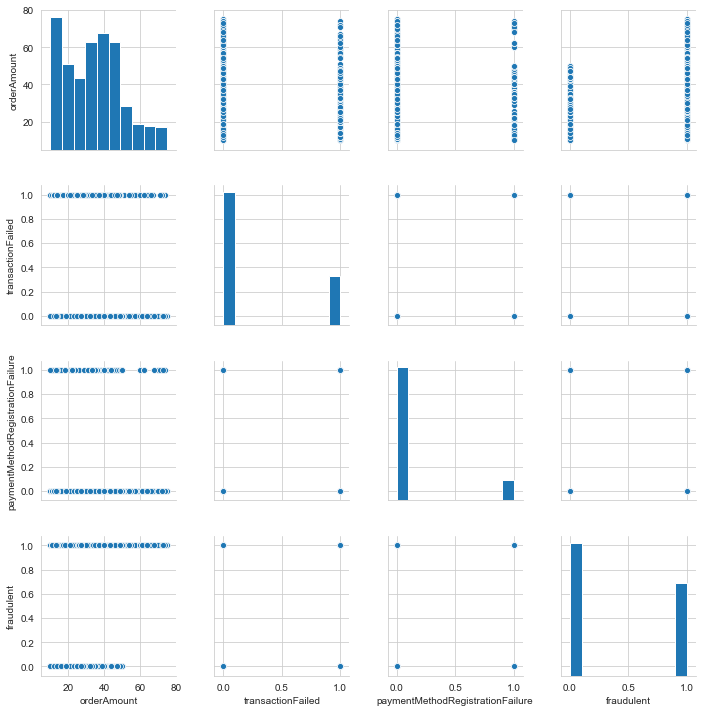

In [89]:
sns.pairplot(num_features)#pairplot

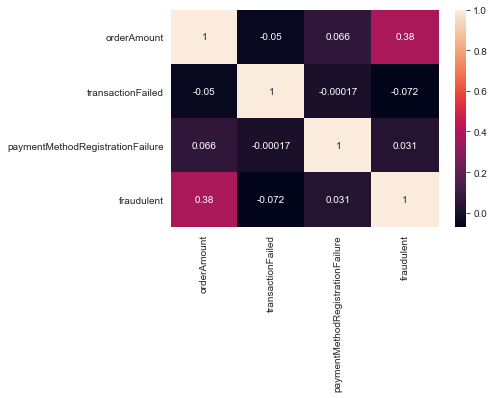

In [90]:
sns.heatmap(num_features.corr(),annot=True)#Corelation plot

In [91]:
#Label encoding
le=LabelEncoder()
for i in cat_features:
    data[i]=le.fit_transform(data[i])

In [92]:
data.head()

,orderAmount,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,orderState,fraudulent,Customer_state,ordershipping_state,customer_mailing_sites
0,18,0,2,4,1,2,2,0,2,2,0
1,26,0,2,4,1,2,1,0,2,2,0
2,45,0,0,0,0,1,1,1,11,2,0
3,23,0,0,0,0,1,1,1,11,11,0
4,43,1,8,8,1,1,1,1,11,4,0


In [93]:
#Dummification
columns=['paymentMethodIssuer','paymentMethodProvider','paymentMethodType','orderState','Customer_state','ordershipping_state']
train_data=pd.get_dummies(data,columns=columns)

In [94]:
train_data.dtypes

orderAmount                         int64
transactionFailed                   int64
paymentMethodRegistrationFailure    int64
fraudulent                          int64
customer_mailing_sites              int32
paymentMethodIssuer_0               uint8
paymentMethodIssuer_1               uint8
paymentMethodIssuer_2               uint8
paymentMethodIssuer_3               uint8
paymentMethodIssuer_4               uint8
paymentMethodIssuer_5               uint8
paymentMethodIssuer_6               uint8
paymentMethodIssuer_7               uint8
paymentMethodIssuer_8               uint8
paymentMethodIssuer_9               uint8
paymentMethodIssuer_10              uint8
paymentMethodProvider_0             uint8
paymentMethodProvider_1             uint8
paymentMethodProvider_2             uint8
paymentMethodProvider_3             uint8
paymentMethodProvider_4             uint8
paymentMethodProvider_5             uint8
paymentMethodProvider_6             uint8
paymentMethodProvider_7           

In [95]:
train_data.shape

(622, 72)

In [96]:
x=train_data.drop('fraudulent',axis=1)
y=train_data['fraudulent']
print(x.shape)
print(y.shape)

(622, 71)
(622,)


In [97]:
y.value_counts()

0    366
1    256
Name: fraudulent, dtype: int64

# Train and Test Split

In [98]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Model Building Using RandomForestClassifier

In [99]:
#Bulding a pipeline
classifier = RandomForestClassifier(n_estimators=100)

pipeline = Pipeline([
    ('clf', classifier),
])

In [100]:
parameter_grid = {
    'clf__max_features': [0.5, 1,2,3],
    'clf__max_depth': [1,2,3,4,5,None],
}

In [101]:
grid_search = GridSearchCV(pipeline, parameter_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] clf__max_depth=1, clf__max_features=0.5 .........................
[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.7425742574257426, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=0.5 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.7171717171717171, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=0.5 .........................
[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.797979797979798, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=0.5 .........................
[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.7676767676767676, total=   0.0s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s



[CV] clf__max_depth=1, clf__max_features=0.5 .........................
[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.7373737373737373, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.5841584158415841, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.5858585858585859, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.5858585858585859, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.5858585858585859, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.5858585858585859, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=2 ..................

[CV]  clf__max_depth=3, clf__max_features=3, score=0.6565656565656566, total=   0.0s
[CV] clf__max_depth=3, clf__max_features=3 ...........................
[CV]  clf__max_depth=3, clf__max_features=3, score=0.696969696969697, total=   0.0s
[CV] clf__max_depth=3, clf__max_features=3 ...........................
[CV]  clf__max_depth=3, clf__max_features=3, score=0.6464646464646465, total=   0.0s
[CV] clf__max_depth=3, clf__max_features=3 ...........................
[CV]  clf__max_depth=3, clf__max_features=3, score=0.6363636363636364, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=0.5 .........................
[CV]  clf__max_depth=4, clf__max_features=0.5, score=0.7722772277227723, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=0.5 .........................
[CV]  clf__max_depth=4, clf__max_features=0.5, score=0.7171717171717171, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=0.5 .........................
[CV]  clf__max_depth=4, clf__max_features=0.5, score=0.808080

[CV]  clf__max_depth=None, clf__max_features=2, score=0.8910891089108911, total=   0.0s
[CV] clf__max_depth=None, clf__max_features=2 ........................
[CV]  clf__max_depth=None, clf__max_features=2, score=0.8383838383838383, total=   0.0s
[CV] clf__max_depth=None, clf__max_features=2 ........................
[CV]  clf__max_depth=None, clf__max_features=2, score=0.9191919191919192, total=   0.0s
[CV] clf__max_depth=None, clf__max_features=2 ........................
[CV]  clf__max_depth=None, clf__max_features=2, score=0.8585858585858586, total=   0.0s
[CV] clf__max_depth=None, clf__max_features=2 ........................
[CV]  clf__max_depth=None, clf__max_features=2, score=0.8787878787878788, total=   0.0s
[CV] clf__max_depth=None, clf__max_features=3 ........................
[CV]  clf__max_depth=None, clf__max_features=3, score=0.8811881188118812, total=   0.0s
[CV] clf__max_depth=None, clf__max_features=3 ........................
[CV]  clf__max_depth=None, clf__max_features=3

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   14.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__max_features': [0.5, 1, 2, 3], 'clf__max_depth': [1, 2, 3, 4, 5, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [102]:
sorted(grid_search.cv_results_.keys())
grid_search.best_score_
grid_search.best_params_

{'clf__max_depth': None, 'clf__max_features': 2}

Accuracy of the GBM on train set: 1.000
Accuracy of the GBM on test set: 0.944
              precision    recall  f1-score   support

           0       0.93      0.99      0.95        75
           1       0.98      0.88      0.93        50

   micro avg       0.94      0.94      0.94       125
   macro avg       0.95      0.93      0.94       125
weighted avg       0.95      0.94      0.94       125



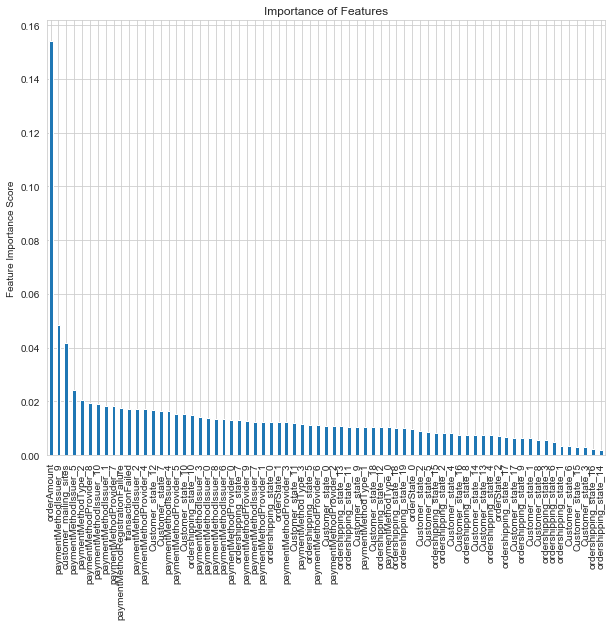

In [103]:
random=RandomForestClassifier(n_estimators=100,max_depth=None,max_features=2)
random.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(random.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(10,8))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on train set: {:.3f}'.format(random.score(X_train, y_train)))
print('Accuracy of the GBM on test set: {:.3f}'.format(random.score(X_test, y_test)))
pred=random.predict(X_test)
print(classification_report(y_test, pred))

In [104]:
model=SelectFromModel(RandomForestClassifier(n_estimators = 100,max_depth=None,max_features=3))
model.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [105]:
model.get_support()

array([ True,  True,  True,  True, False,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True, False, False,
       False,  True,  True, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False])

In [106]:
selected_feat= X_train.columns[(model.get_support())]
len(selected_feat)

22

In [107]:
print(selected_feat)

Index(['orderAmount', 'transactionFailed', 'paymentMethodRegistrationFailure',
       'customer_mailing_sites', 'paymentMethodIssuer_1',
       'paymentMethodIssuer_3', 'paymentMethodIssuer_4',
       'paymentMethodIssuer_5', 'paymentMethodIssuer_7',
       'paymentMethodIssuer_9', 'paymentMethodIssuer_10',
       'paymentMethodProvider_0', 'paymentMethodProvider_4',
       'paymentMethodProvider_5', 'paymentMethodProvider_7',
       'paymentMethodProvider_8', 'paymentMethodType_2', 'Customer_state_7',
       'Customer_state_10', 'Customer_state_12', 'Customer_state_18',
       'ordershipping_state_10'],
      dtype='object')


In [108]:
columns=['orderAmount', 'transactionFailed', 'paymentMethodRegistrationFailure',
       'customer_mailing_sites', 'paymentMethodIssuer_0',
       'paymentMethodIssuer_2', 'paymentMethodIssuer_3',
       'paymentMethodIssuer_4', 'paymentMethodIssuer_5',
       'paymentMethodIssuer_9', 'paymentMethodIssuer_10',
       'paymentMethodProvider_3', 'paymentMethodProvider_4',
       'paymentMethodProvider_5', 'paymentMethodProvider_7',
       'paymentMethodProvider_8', 'paymentMethodProvider_9',
       'paymentMethodType_2', 'Customer_state_7', 'Customer_state_10',
       'Customer_state_12', 'ordershipping_state_10']
x_train=X_train[columns]
x_test=X_test[columns]

Accuracy of the GBM on train set: 0.998
Accuracy of the GBM on test set: 0.944
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        75
           1       0.96      0.90      0.93        50

   micro avg       0.94      0.94      0.94       125
   macro avg       0.95      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125



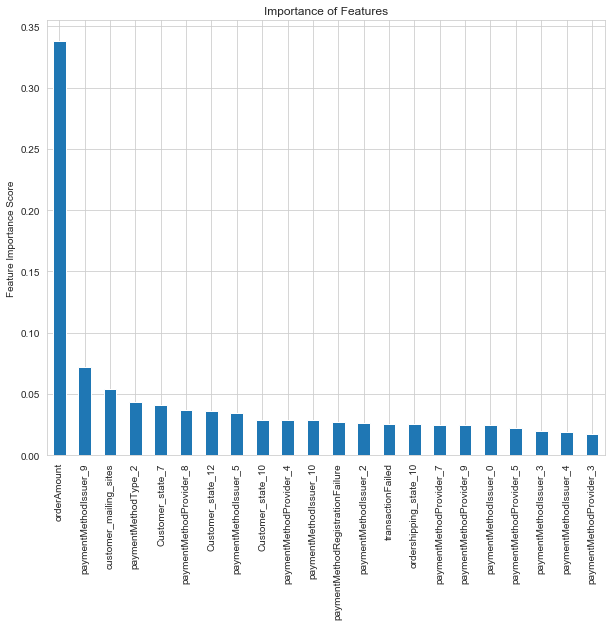

In [109]:
random=RandomForestClassifier(n_estimators=100,max_depth=None,max_features=2)
random.fit(x_train,y_train)
predictors=list(x_train)
feat_imp = pd.Series(random.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(10,8))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on train set: {:.3f}'.format(random.score(x_train, y_train)))
print('Accuracy of the GBM on test set: {:.3f}'.format(random.score(x_test, y_test)))
pred=random.predict(x_test)
print(classification_report(y_test, pred))

In [110]:
pd.crosstab(y_test,pred, rownames=['Real data'], colnames=['Predicted'])

Predicted,0,1
Real data,,
0,73,2
1,5,45


# Model Building using GradientBoostingClassfier

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=100)

pipeline = Pipeline([
    ('clf', classifier),
])

In [112]:
parameter_grid = {
    'clf__max_features': [0.5, 1,2,3],
    'clf__max_depth': [1,2,3,4,5,None],
}

In [113]:
grid_search = GridSearchCV(pipeline, parameter_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] clf__max_depth=1, clf__max_features=0.5 .........................
[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.7623762376237624, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=0.5 .........................
[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.7373737373737373, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=0.5 .........................
[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.7878787878787878, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=0.5 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.7575757575757576, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=0.5 .........................
[CV]  clf__max_depth=1, clf__max_features=0.5, score=0.7272727272727273, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.7326732673267327, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.7373737373737373, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.7474747474747475, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.7373737373737373, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1 ...........................
[CV]  clf__max_depth=1, clf__max_features=1, score=0.6464646

[CV]  clf__max_depth=3, clf__max_features=3, score=0.7878787878787878, total=   0.0s
[CV] clf__max_depth=3, clf__max_features=3 ...........................
[CV]  clf__max_depth=3, clf__max_features=3, score=0.8585858585858586, total=   0.0s
[CV] clf__max_depth=3, clf__max_features=3 ...........................
[CV]  clf__max_depth=3, clf__max_features=3, score=0.8585858585858586, total=   0.0s
[CV] clf__max_depth=3, clf__max_features=3 ...........................
[CV]  clf__max_depth=3, clf__max_features=3, score=0.8282828282828283, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=0.5 .........................
[CV]  clf__max_depth=4, clf__max_features=0.5, score=0.8712871287128713, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=0.5 .........................
[CV]  clf__max_depth=4, clf__max_features=0.5, score=0.8080808080808081, total=   0.0s
[CV] clf__max_depth=4, clf__max_features=0.5 .........................
[CV]  clf__max_depth=4, clf__max_features=0.5, score=0.82828

[CV]  clf__max_depth=None, clf__max_features=1, score=0.8787878787878788, total=   0.4s
[CV] clf__max_depth=None, clf__max_features=2 ........................
[CV]  clf__max_depth=None, clf__max_features=2, score=0.8910891089108911, total=   0.4s
[CV] clf__max_depth=None, clf__max_features=2 ........................
[CV]  clf__max_depth=None, clf__max_features=2, score=0.8787878787878788, total=   0.4s
[CV] clf__max_depth=None, clf__max_features=2 ........................
[CV]  clf__max_depth=None, clf__max_features=2, score=0.9292929292929293, total=   0.4s
[CV] clf__max_depth=None, clf__max_features=2 ........................
[CV]  clf__max_depth=None, clf__max_features=2, score=0.898989898989899, total=   0.5s
[CV] clf__max_depth=None, clf__max_features=2 ........................
[CV]  clf__max_depth=None, clf__max_features=2, score=0.8888888888888888, total=   0.4s
[CV] clf__max_depth=None, clf__max_features=3 ........................
[CV]  clf__max_depth=None, clf__max_features=3,

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   16.7s finished
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__max_features': [0.5, 1, 2, 3], 'clf__max_depth': [1, 2, 3, 4, 5, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [114]:
sorted(grid_search.cv_results_.keys())
grid_search.best_score_
grid_search.best_params_

{'clf__max_depth': None, 'clf__max_features': 3}

Accuracy of the GBM on train set: 1.000
Accuracy of the GBM on test set: 0.936
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        75
           1       1.00      0.84      0.91        50

   micro avg       0.94      0.94      0.94       125
   macro avg       0.95      0.92      0.93       125
weighted avg       0.94      0.94      0.93       125



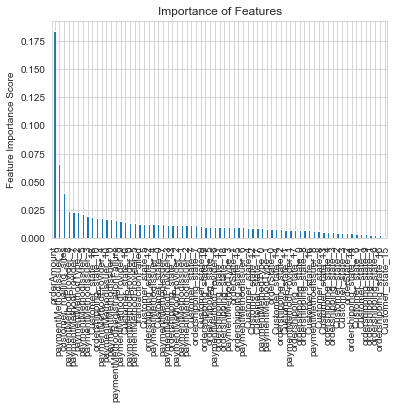

In [115]:
baseline = GradientBoostingClassifier(n_estimators=50,max_features=3,max_depth=None)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on train set: {:.3f}'.format(baseline.score(X_train, y_train)))
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

In [116]:
model=SelectFromModel(GradientBoostingClassifier(n_estimators = 100,max_depth=None,max_features=2))
model.fit(X_train, y_train)

SelectFromModel(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=None,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [117]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
        True,  True,  True, False,  True,  True,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False])

In [118]:
selected_feat= X_train.columns[(model.get_support())]
len(selected_feat)

25

In [119]:
print(selected_feat)

Index(['orderAmount', 'transactionFailed', 'paymentMethodRegistrationFailure',
       'customer_mailing_sites', 'paymentMethodIssuer_0',
       'paymentMethodIssuer_1', 'paymentMethodIssuer_3',
       'paymentMethodIssuer_4', 'paymentMethodIssuer_5',
       'paymentMethodIssuer_9', 'paymentMethodIssuer_10',
       'paymentMethodProvider_3', 'paymentMethodProvider_4',
       'paymentMethodProvider_5', 'paymentMethodProvider_7',
       'paymentMethodProvider_8', 'paymentMethodProvider_9',
       'paymentMethodType_2', 'Customer_state_0', 'Customer_state_7',
       'Customer_state_10', 'Customer_state_11', 'Customer_state_12',
       'Customer_state_18', 'ordershipping_state_10'],
      dtype='object')


In [120]:
columns=['orderAmount', 'paymentMethodRegistrationFailure',
       'customer_mailing_sites', 'paymentMethodIssuer_0',
       'paymentMethodIssuer_1', 'paymentMethodIssuer_2',
       'paymentMethodIssuer_3', 'paymentMethodIssuer_4',
       'paymentMethodIssuer_5', 'paymentMethodIssuer_6',
       'paymentMethodIssuer_8', 'paymentMethodIssuer_9',
       'paymentMethodIssuer_10', 'paymentMethodProvider_2',
       'paymentMethodProvider_4', 'paymentMethodProvider_5',
       'paymentMethodProvider_7', 'paymentMethodProvider_8',
       'paymentMethodProvider_9', 'paymentMethodType_2', 'paymentMethodType_3',
       'Customer_state_0', 'Customer_state_7', 'Customer_state_12']
x_train=X_train[columns]
x_test=X_test[columns]

Accuracy of the GBM on train set: 0.998
Accuracy of the GBM on test set: 0.936
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        75
           1       0.96      0.88      0.92        50

   micro avg       0.94      0.94      0.94       125
   macro avg       0.94      0.93      0.93       125
weighted avg       0.94      0.94      0.94       125



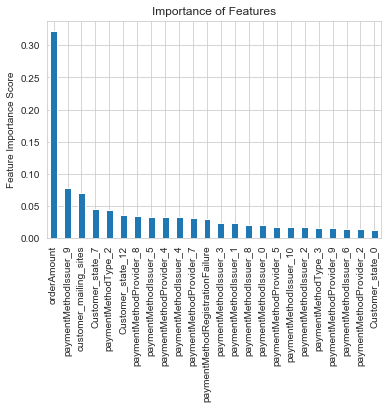

In [121]:
baseline = GradientBoostingClassifier(n_estimators=100,max_features=2,max_depth=None)
baseline.fit(x_train,y_train)
predictors=list(x_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on train set: {:.3f}'.format(baseline.score(x_train, y_train)))
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(x_test, y_test)))
pred=baseline.predict(x_test)
print(classification_report(y_test, pred))

In [122]:
pd.crosstab(y_test,pred, rownames=['Real data'], colnames=['Predicted'])

Predicted,0,1
Real data,,
0,73,2
1,6,44


#By Comparing two models Random Forest performed better